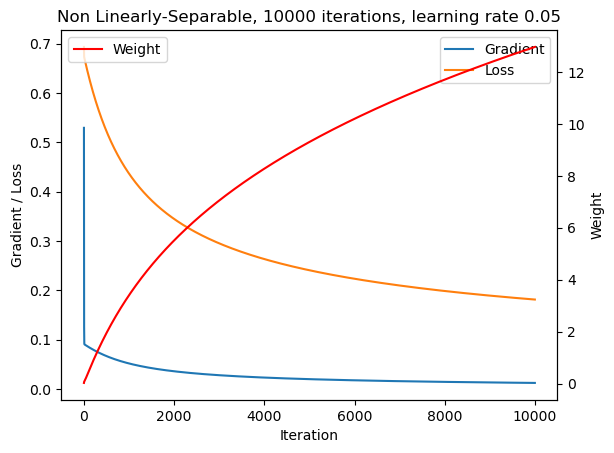

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the dataset
iris = load_iris ()
X = iris.data [:, [2, 3]] # Using petal length and petal width
y = iris.target

# --- Case 1: Not Linearly Separable ( Versicolor vs. Virginica ) ---
X_nls_full = X [ y != 0]
y_nls_full = y [ y != 0]
y_nls_full [ y_nls_full == 1] = 0 # Versicolor
y_nls_full [ y_nls_full == 2] = 1 # Virginica
X_train_nls, X_test_nls, y_train_nls, y_test_nls = train_test_split (X_nls_full, y_nls_full, test_size =0.3, random_state =42)

# --- Case 2: Linearly Separable ( Setosa vs. The Rest ) ---
X_ls_full = X
y_ls_full = np.copy ( y )
y_ls_full [ y_ls_full != 0] = 1 # Versicolor and Virginica are class 1
X_train_ls, X_test_ls, y_train_ls, y_test_ls = train_test_split (X_ls_full, y_ls_full, test_size =0.3, random_state =42)

# Helper function to add the bias term (x0 =1)
def add_bias ( X ) :
    return np.c_[np.ones(X.shape[0]), X]

# Take a scalar or numpy array ‘a‘ and return the sigmoid activation
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

# Compute the Negative Log Likelihood loss
def nll_loss(y_true, y_pred):
    # NLL is defined as NLL = −[y⋅log(pred)+(1−y)⋅log(1−pred)]
    return -np.mean((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)))

# Calculate gradient of NLL loss with respect to weights W
def calculate_gradient(X, y_true, weights):
    n = X.shape[0]
    # Gradient is deriviative i.e. 1/n . xt . (y^ - y_true) where X is feature matrix, y^ is sigmoid(X . w) and y_true is vector
    y_pred = sigmoid(X @ weights)
    gradient = (X.T @ (y_pred - y_true)) / n
    return gradient

# Perform Gradient Descent. Initialize weights, and then iteratively update them. 
# The function returns the final weights and a history of the loss and gradient norm.
def train_logistic_regression(X, y_true, alpha, iterations):
    # Initialise weights.
    X_bias = add_bias(X)
    current_weights = np.zeros(X_bias.shape[1])
    losses = []
    gradients = []
    weights = []
   # Iterate
    for i in range(iterations):
        gradient = calculate_gradient(X_bias, y_true, current_weights)
        gradients.append(np.linalg.norm(gradient))
        losses.append(nll_loss(y_true, sigmoid(X_bias @ current_weights)))
        current_weights -= alpha * gradient
        weights.append(np.linalg.norm(current_weights))
    return weights, gradients, losses

# Task 1: Non-Linearly Separable Case Train your model on the non-linearly-separable dataset. 
# Plot the loss and gradient norm over iterations. You should see them both converge.

weights_nls, gradients_nls, losses_nls = train_logistic_regression(X_train_nls, y_train_nls, 0.05, 10000)
plt.title("Non Linearly-Separable, 10000 iterations, learning rate 0.05")
plt.xlabel("Iteration")
plt.ylabel("Gradient / Loss")
plt.plot(gradients_nls, label="Gradient")
plt.plot(losses_nls, label="Loss")
plt.legend()
plt.twinx()
plt.ylabel("Weight")
plt.plot(weights_nls, "r", label="Weight")
plt.legend()
plt.show()

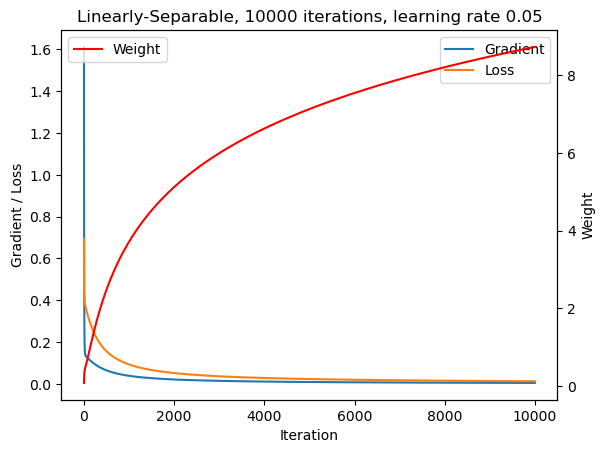

In [7]:
# Task 2: Linearly Separable Case Train your model on the linearly-separable dataset
# for a large number of iterations (e.g., 5000). Plot the loss and gradient norm.

weights_ls, gradients_ls, losses_ls = train_logistic_regression(X_train_ls, y_train_ls, 0.05, 10000)
plt.title("Linearly-Separable, 10000 iterations, learning rate 0.05")
plt.xlabel("Iteration")
plt.ylabel("Gradient / Loss")
plt.plot(gradients_ls, label="Gradient")
plt.plot(losses_ls, label="Loss")
plt.legend()
plt.twinx()
plt.ylabel("Weight")
plt.plot(weights_ls, "r", label="Weight")
plt.legend()
plt.show()

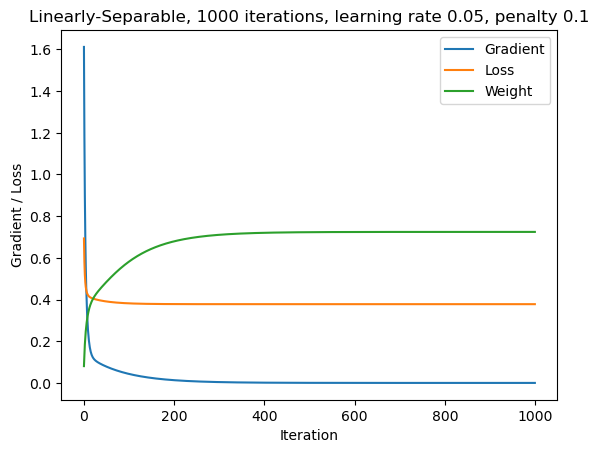

In [8]:

# # Compute the Negative Log Likelihood loss
def nll_loss_with_penalty(y_true, y_pred, weights, lmbda):
    # J(w) = NLL(w) + λ||w||^2
    penalty = lmbda * (np.linalg.norm(weights)**2)
    return nll_loss(y_true, y_pred) + penalty

# # Calculate gradient of NLL loss with respect to weights W
def calculate_gradient_with_penalty(X, y_true, weights, lmbda):
    # Penalty gradient is derivative of penalty i.e. 2.lmbda.weights
    penalty = 2 * lmbda * weights
    return calculate_gradient(X, y_true, weights) + penalty

# # # Perform Gradient Descent. Initialize weights, and then iteratively update them. 
# # # The function returns the final weights and a history of the loss and gradient norm.
def train_logistic_regression_with_penalty(X, y_true, alpha, iterations, lmbda):
    # Initialise weights.
    X_bias = add_bias(X)
    current_weights = np.zeros(X_bias.shape[1])
    losses = []
    gradients = []
    weights = []
   # Iterate
    for i in range(iterations):
        gradient = calculate_gradient_with_penalty(X_bias, y_true, current_weights, lmbda)
        gradients.append(np.linalg.norm(gradient))
        losses.append(nll_loss_with_penalty(y_true, sigmoid(X_bias @ current_weights), current_weights, lmbda))
        current_weights -= alpha * gradient
        weights.append(np.linalg.norm(current_weights))
    return weights, gradients, losses, current_weights

weights_lsp, gradients_lsp, losses_lsp, _= train_logistic_regression_with_penalty(X_train_ls, y_train_ls, 0.05, 1000, 0.1)

plt.title("Linearly-Separable, 1000 iterations, learning rate 0.05, penalty 0.1")
plt.xlabel("Iteration")
plt.ylabel("Gradient / Loss")
plt.plot(gradients_lsp, label="Gradient")
plt.plot(losses_lsp, label="Loss")
plt.plot(weights_lsp, label="Weight")
plt.legend()
plt.show()

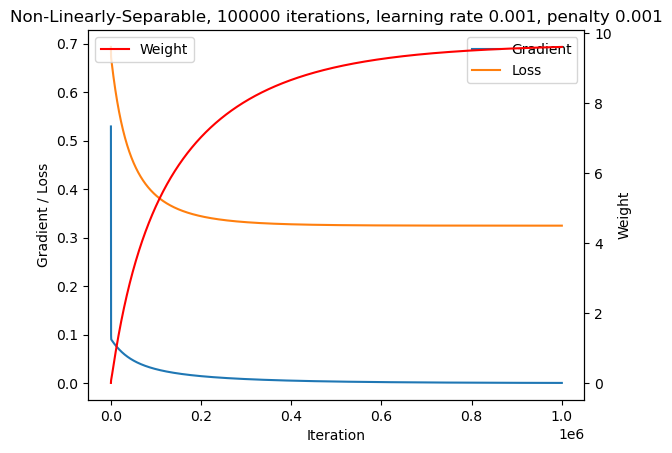

In [27]:
weights_nlsp, gradients_nlsp, losses_nlsp, end_weight = train_logistic_regression_with_penalty(X_train_nls, y_train_nls, 0.001, 1000000, 0.001)

plt.title("Non-Linearly-Separable, 100000 iterations, learning rate 0.001, penalty 0.001")
plt.xlabel("Iteration")
plt.ylabel("Gradient / Loss")
plt.plot(gradients_nlsp, label="Gradient")
plt.plot(losses_nlsp, label="Loss")
plt.legend()
plt.twinx()
plt.ylabel("Weight")
plt.plot(weights_nlsp, "r", label="Weight")
plt.legend()
plt.show()

[0.38641939 0.72001826 0.9493627  0.11256615 0.15745916 0.14492311
 0.36351961 0.82869676 0.03985147 0.26011148 0.31960572 0.06612512
 0.64622582 0.48129585 0.96337717 0.33032437 0.63497602 0.64622582
 0.05032592 0.04376386 0.93059225 0.63497602 0.26962555 0.10316661
 0.37489952 0.23290371 0.12270493 0.73863636 0.1921163  0.90526565]
[0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1]
 - - - Classification Report - - -
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30


- - - Confusion Matrix - - -
[[17  0]
 [ 2 11]]

AUC Score : 0.9910


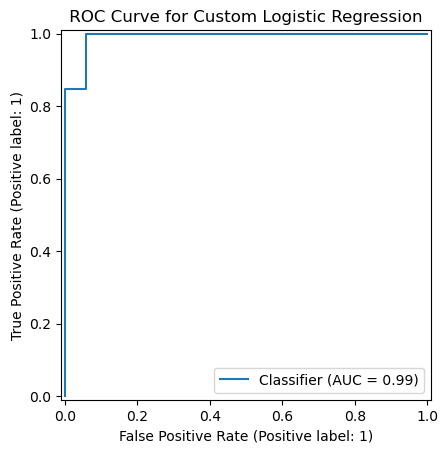

In [26]:
from sklearn . metrics import classification_report, confusion_matrix, roc_auc_score ,RocCurveDisplay

# --- Your code here ---
# 1. Train your regularized model on the NLS training data to get final_w
# 2. Make predictions on the test data X_test_nls
X_test_nls_bias = add_bias (X_test_nls)

probabilities = sigmoid(X_test_nls_bias @ end_weight)
y_pred = ( probabilities >= 0.5).astype(int)
roc = roc_auc_score(y_test_nls , probabilities)
print(probabilities)
print(y_pred)

# --- Evaluation Code ---
print(" - - - Classification Report - - -")
print( classification_report ( y_test_nls , y_pred ))

print("\n- - - Confusion Matrix - - -")
print( confusion_matrix ( y_test_nls , y_pred ))

print(f"\nAUC Score : { roc:.4f}")

RocCurveDisplay.from_predictions(y_test_nls ,probabilities)
plt.title(" ROC Curve for Custom Logistic Regression ")
plt.show ()

In [11]:
spam_dict = {"free money offer now": True, 
              "call me now": True,
              "can you call me later": False,
              "did you get the money": False,
              "let's meet later": False}

# 1. Calculate Class Priors: Calculate the prior probabilities, P(Spam) and P(Ham).
p_spam = sum(value for value in spam_dict.values())/len(spam_dict)
p_not_spam = 1 - p_spam

print(f"p_spam {p_spam}")
print(f"p_not_spam {p_not_spam}")

p_spam 0.4
p_not_spam 0.6


In [19]:
# Dictionary keyed on word with the tuple (not_spam_occurrences, spam_occurrences)
word_dict = {}
spam_word_count = 0

for sentence in spam_dict:
    is_spam = spam_dict[sentence]
    for word in sentence.split():
        spam_word_count += int(is_spam)
        if word in word_dict:
            word_tuple = word_dict[word]
            word_dict[word] = (word_tuple[0]+int(not(is_spam)), word_tuple[1]+int(is_spam))
        else:
            word_dict.update({word: (int(not(is_spam)), int(is_spam))})

word_count_in_spam = sum(word_tuple[1] for word_tuple in word_dict.values())
word_count_not_spam = sum(word_tuple[0] for word_tuple in word_dict.values())
vocab_size = len(word_dict)

In [13]:
# 2. Calculate Word Likelihoods: Calculate P(word|Class) for ”free” and ”call” using the
# add-one smoothing formula: P(word|Class) = (count(word in Class) + 1) / (total words in Class + V)
print(word_dict)
print(vocab_size)
print(word_count_in_spam)
print(word_count_not_spam)

# For word "free"
p_free_spam = (word_dict["free"][1]+1) / (word_count_in_spam + vocab_size)
p_free_not_spam = (word_dict["free"][0]+1) / (word_count_not_spam + vocab_size)

print(f"Word Free spam score is {p_free_spam:.4f}")
print(f"Word Free not spam score is {p_free_not_spam:.4f}")

# For word "call"
p_call_spam = (word_dict["call"][1]+1) / (word_count_in_spam + vocab_size)
p_call_not_spam = (word_dict["call"][0]+1) / (word_count_not_spam + vocab_size)

print(f"Word Call spam score is {p_call_spam:.4f}")
print(f"Word Call not spam score is {p_call_not_spam:.4f}")

{'free': (0, 1), 'money': (1, 1), 'offer': (0, 1), 'now': (0, 2), 'call': (1, 1), 'me': (1, 1), 'can': (1, 0), 'you': (2, 0), 'later': (2, 0), 'did': (1, 0), 'get': (1, 0), 'the': (1, 0), "let's": (1, 0), 'meet': (1, 0)}
14
7
13
Word Free spam score is 0.0952
Word Free not spam score is 0.0370
Word Call spam score is 0.0952
Word Call not spam score is 0.0741


In [14]:
from sklearn.datasets import fetch_20newsgroups

categories = ["sci.space", "talk.religion.misc"]
train_data = fetch_20newsgroups(subset ="train", categories = categories, shuffle = True, random_state =42)
test_data = fetch_20newsgroups(subset ="test", categories = categories, shuffle = True, random_state =42)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words ="english")
X_train = vectorizer.fit_transform(train_data.data )
X_test = vectorizer.transform(test_data.data )
y_train = train_data.target
y_test = test_data.target

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB ()
model.fit(X_train, y_train )
y_pred = model.predict(X_test )
print(classification_report(y_test, y_pred, target_names = train_data.target_names))

                    precision    recall  f1-score   support

         sci.space       0.97      0.99      0.98       394
talk.religion.misc       0.99      0.96      0.97       251

          accuracy                           0.98       645
         macro avg       0.98      0.98      0.98       645
      weighted avg       0.98      0.98      0.98       645



In [18]:
# Select a document
doc_index = 10
doc_vector = X_test [ doc_index ]

# Get the model's prediction
model_prediction = model.predict(doc_vector)[0]
predicted_class_name = train_data.target_names [model_prediction]

print(f" Model's Prediction : '{ predicted_class_name } '")

 Model's Prediction : 'talk.religion.misc '


In [17]:
# --- Manually calculate the score for each class ---
log_prior_space = model.class_log_prior_ [0]
log_prior_religion = model.class_log_prior_ [1]

log_likelihoods_space = model.feature_log_prob_ [0, :]
log_likelihoods_religion = model.feature_log_prob_ [1, :]

# The dot product sums the log - likelihoods for the words present in the document.
score_space = log_prior_space + doc_vector.dot(log_likelihoods_space)
score_religion = log_prior_religion + doc_vector.dot(log_likelihoods_religion)

# Manually calculate and display results.
print(f"Score(sci.space) = {score_space[0]:.4f}")
print(f"Score(talk.religion.misc) = {score_religion[0]:.4f}")
manual_prediction = int(score_religion[0] > score_space[0])
print(f"Manual Prediction: '{train_data.target_names[manual_prediction]}'")
print(f"Match: {model_prediction == manual_prediction}")

Score(sci.space) = -698.6741
Score(talk.religion.misc) = -617.9126
Manual Prediction: 'talk.religion.misc'
Match: True
